### Notebook to test OptoSim photon transport

In [1]:
import sys
sys.path.insert(0,'../python/')
from OpticalPhoton import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import json

#### Setup the system geometry

In [24]:
filename = 'testit.json'
# done through the config file.....
config = {
    "nevents": 1000,
    "nphoton_per_event": 100000,
    "photon_zgen": 0.1,
    "geometry":{
        "type": "cylinder",
        "radius": 2.5,
        "ztop": 1.0,
        "zliq": 0.0,
        "zbot": -5.0
    },
    "npmt_xy": 2,
    "pmt":{
        "type": "square",
        "size": 2.54,
        "ndivs": 10
    },
    "set_no_scatter": False,
    "set_experimental_scatter_model": True
}

with open(filename, "w") as json_file:
    json.dump(config, json_file, indent=4)

#### Setup the simulation parameters

In [25]:
x0 = (-2., 0, 0.1) # starting position of the photons

#### Simulate photon transport

In [26]:
%%time

#
# all configs in the json file.....
#
myPhoton = OpticalPhoton(config='testit.json')

xb = []
yb = []
xt = []
yt = []


for i in range(config['nphoton_per_event']):
    if i%10000 == 0:
        print('processed ',i,' photons')
    # normal
    myPhoton.generate_photon(x0=x0)
    myPhoton.set_photon_direction(np.array([1,0,0.0001]))
    myPhoton.propagate()
    
    if myPhoton.is_detected():
        x = myPhoton.get_photon_position()
        #myPhoton.print()
        if x[2]<0:
            xb.append(x[0])
            yb.append(x[1])
        else:
            xt.append(x[0])
            yt.append(x[1])

    
xb = np.array(xb)
yb = np.array(yb)
xt = np.array(xt)
yt = np.array(yt)

print(len(xb), len(xt))

OpticalPhoton::Reading configuration from file: testit.json
'set_no_scatter' set to False
'set_experimental_scatter_model' set to True
processed  0  photons
processed  10000  photons
processed  20000  photons
processed  30000  photons
processed  40000  photons
processed  50000  photons
processed  60000  photons
processed  70000  photons
processed  80000  photons
processed  90000  photons
27577 24935
CPU times: user 18.7 s, sys: 173 ms, total: 18.9 s
Wall time: 21.6 s


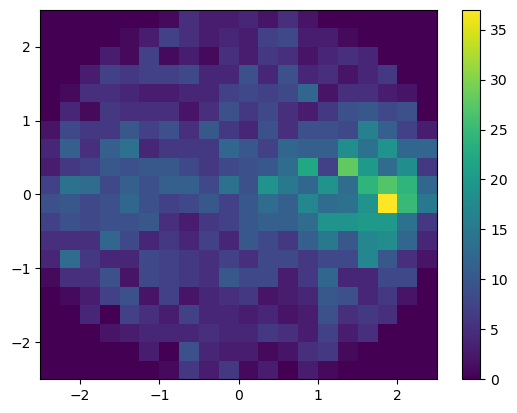

In [23]:
R = config['geometry']['radius']
h2=plt.hist2d(xt,yt,bins=(20,20),range=((-R,R),(-R,R)))#, norm=mpl.colors.LogNorm())
plt.colorbar()

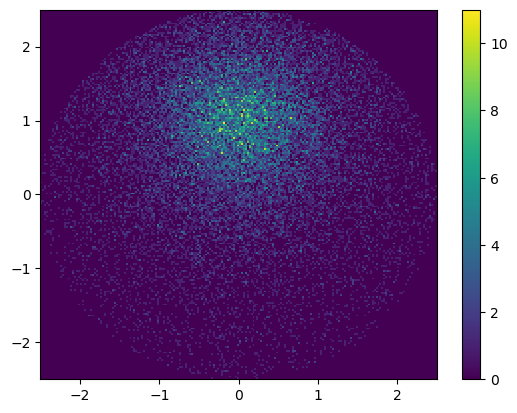

In [13]:
R = config['geometry']['radius']
h2=plt.hist2d(xt,yt,bins=(200,200),range=((-R,R),(-R,R)))#, norm=mpl.colors.LogNorm())
plt.colorbar()

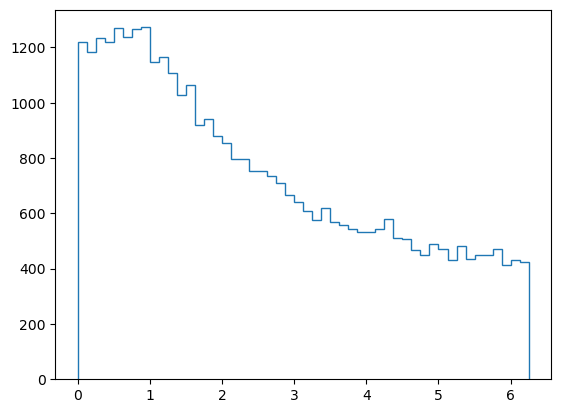

In [9]:
plt.hist((xt**2+yt**2),bins=50,range=(0,R**2), histtype='step')
# plt.hist(yb,bins=50,range=(-R,R), histtype='step')
plt.yscale('linear')

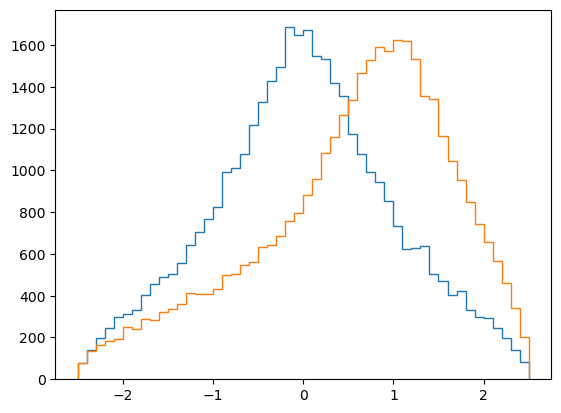

In [8]:
plt.hist(xt,bins=50,range=(-R,R), histtype='step')
plt.hist(yt,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

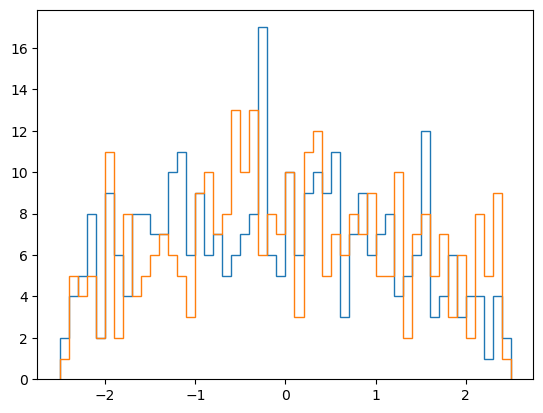

In [9]:
plt.hist(xb,bins=50,range=(-R,R), histtype='step')
plt.hist(yb,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

In [10]:
import h5py